## Part A. Data Preparation, Preprocessing, Visulaization

In [301]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")


In [186]:
print(sentiment.shape)
print(trades.shape)

print(sentiment.isnull().sum())
print(trades.isnull().sum())

print(sentiment.duplicated().sum())
print(trades.duplicated().sum())


(2644, 4)
(211224, 16)
timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
0
0


In [187]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [188]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [189]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [190]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [191]:
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [192]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

In [193]:
trades['time']=trades['Timestamp IST'].dt.time
trades['trade_date']=trades['Timestamp IST'].dt.date

In [194]:
trades['Timestamp'] = pd.to_numeric(trades['Timestamp'], errors='coerce').astype('Int64')

In [195]:
trades['trade_date']=pd.to_datetime(trades['trade_date'])

In [196]:
# Merge datasets
df = pd.merge(
    trades,                      # keep all trade columns
    sentiment,                   # keep all sentiment columns
    left_on='trade_date',        # trades column
    right_on='date',             # sentiment column
    how='left'                   # keep all trades, add sentiment info
)

In [197]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,time,trade_date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1730000000000,22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1730000000000,22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1730000000000,22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1730000000000,22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1730000000000,22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


In [198]:
# Drop duplicate 'date' column if you want only one
df = df.drop(columns=['date','Timestamp IST'])

In [199]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,trade_date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1730000000000,22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1730000000000,22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1730000000000,22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1730000000000,22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1730000000000,22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Start Position    211224 non-null  float64       
 7   Direction         211224 non-null  object        
 8   Closed PnL        211224 non-null  float64       
 9   Transaction Hash  211224 non-null  object        
 10  Order ID          211224 non-null  int64         
 11  Crossed           211224 non-null  bool          
 12  Fee               211224 non-null  float64       
 13  Trade ID          211224 non-null  float64       
 14  Time

### Metrics



#### 1. Shows which traders/accounts are consistently profitable and which are losing. Helps identify strong performers and risky accounts.

In [201]:
daily_pnl = merged.groupby(['trade_date','Account'])['Closed PnL'].sum().reset_index()

     trade_date                                     Account     Closed PnL
0    2023-05-01  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891       0.000000
1    2023-12-05  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23       0.000000
2    2023-12-14  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    -205.434737
3    2023-12-15  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23     -24.632034
4    2023-12-16  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23       0.000000
...         ...                                         ...            ...
2336 2025-05-01  0xa0feb3725a9335f49874d7cd8eaad6be45b27416    1449.529436
2337 2025-05-01  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  102460.171640
2338 2025-05-01  0xbaaaf6571ab7d571043ff1e313a9609a10637864       1.860320
2339 2025-05-01  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3 -113601.020138
2340 2025-05-01  0xbee1707d6b44d4d52bfe19e41f8a828645437aab    1364.022527

[2341 rows x 3 columns]


   trade_date  Closed PnL    Month
0     2023-05        0.00  2023-05
1     2023-12     2016.01  2023-12
2     2024-01   -13085.94  2024-01
3     2024-02    49862.67  2024-02
4     2024-03   124982.73  2024-03
5     2024-04     8038.59  2024-04
6     2024-05    29331.04  2024-05
7     2024-06   102983.99  2024-06
8     2024-07   138562.40  2024-07
9     2024-08  -106817.23  2024-08
10    2024-09    48235.75  2024-09
11    2024-10    86263.92  2024-10
12    2024-11   133430.03  2024-11
13    2024-12  3005071.10  2024-12
14    2025-01   767745.88  2025-01
15    2025-02  2396979.03  2025-02
16    2025-03  2153250.96  2025-03
17    2025-04  1315571.18  2025-04
18    2025-05    54536.83  2025-05


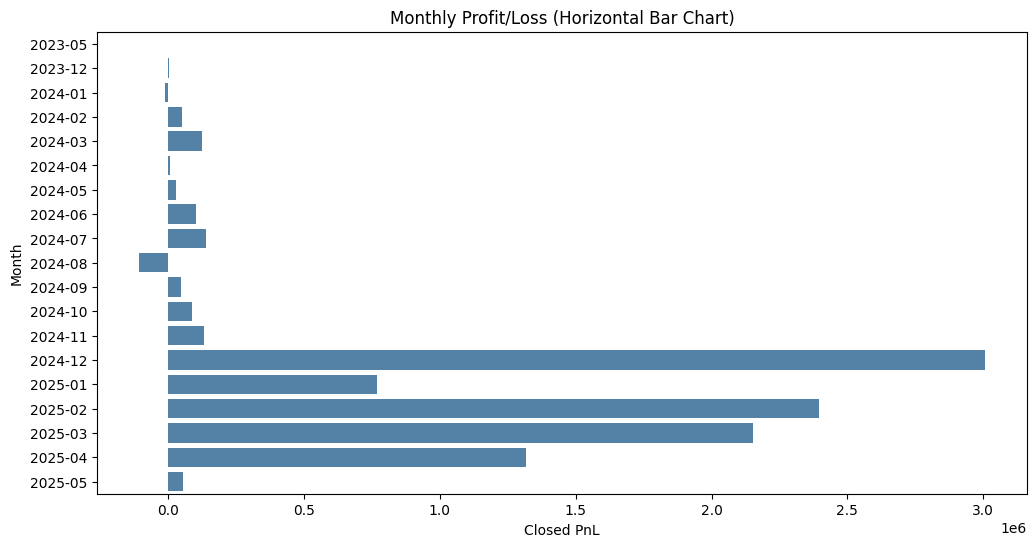

In [283]:
# Force Closed PnL to numeric
merged['Closed PnL'] = pd.to_numeric(merged['Closed PnL'], errors='coerce')

# Group by month and sum
monthly_pnl = (
    merged.groupby(merged['trade_date'].dt.to_period('M'))['Closed PnL']
    .sum()
    .reset_index()
    .round(2)
)
monthly_pnl['Month'] = monthly_pnl['trade_date'].astype(str)

# Debug check: print values to confirm
print(monthly_pnl)

# Horizontal bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_pnl, x='Closed PnL', y='Month', orient='h', color="steelblue")
plt.title("Monthly Profit/Loss (Horizontal Bar Chart)")
plt.xlabel("Closed PnL")
plt.ylabel("Month")
plt.savefig("charts/Monthly Profit and Loss.jpg", dpi=300, bbox_inches='tight')
plt.show()

#### 2. A trader with high win rate but low PnL may be trading small sizes. A trader with low win rate but high PnL may rely on fewer big wins. 

In [202]:
merged['win'] = merged['Closed PnL'] > 0
win_rate = merged.groupby(['trade_date','Account'])['win'].mean().reset_index()
print(win_rate)

     trade_date                                     Account       win
0    2023-05-01  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  0.000000
1    2023-12-05  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  0.000000
2    2023-12-14  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  0.363636
3    2023-12-15  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  0.000000
4    2023-12-16  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  0.000000
...         ...                                         ...       ...
2336 2025-05-01  0xa0feb3725a9335f49874d7cd8eaad6be45b27416  0.350694
2337 2025-05-01  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  0.780822
2338 2025-05-01  0xbaaaf6571ab7d571043ff1e313a9609a10637864  1.000000
2339 2025-05-01  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  0.008621
2340 2025-05-01  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  0.328244

[2341 rows x 3 columns]


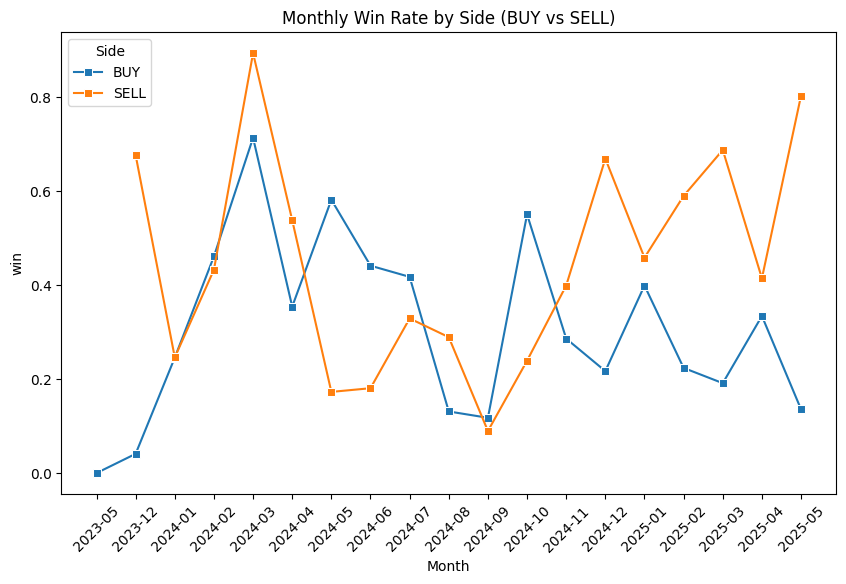

In [284]:
# Mark wins
merged['win'] = merged['Closed PnL'] > 0

# Group by month and side
monthly_win_rate = merged.groupby([merged['trade_date'].dt.to_period('M'), 'Side'])['win'].mean().reset_index()
monthly_win_rate['Month'] = monthly_win_rate['trade_date'].astype(str)

# Plot with hue = Side
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_win_rate, x='Month', y='win', hue='Side', marker='s')
plt.title("Monthly Win Rate by Side (BUY vs SELL)")
plt.xticks(rotation=45)
plt.savefig("charts/Monthly Win rate.jpg", dpi=300, bbox_inches='tight')
plt.show()


#### 3.Reveals risk appetite. Larger average sizes mean higher exposure; smaller sizes suggest cautious trading.

In [203]:
avg_trade_size = merged.groupby(['trade_date','Account'])['Size Tokens'].mean().reset_index()
print(avg_trade_size)

     trade_date                                     Account   Size Tokens
0    2023-05-01  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891      0.083767
1    2023-12-05  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23      1.312112
2    2023-12-14  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    372.026274
3    2023-12-15  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23   1779.000000
4    2023-12-16  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  13299.000000
...         ...                                         ...           ...
2336 2025-05-01  0xa0feb3725a9335f49874d7cd8eaad6be45b27416     21.027216
2337 2025-05-01  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23     77.468493
2338 2025-05-01  0xbaaaf6571ab7d571043ff1e313a9609a10637864      0.200000
2339 2025-05-01  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3      9.267241
2340 2025-05-01  0xbee1707d6b44d4d52bfe19e41f8a828645437aab    124.440382

[2341 rows x 3 columns]


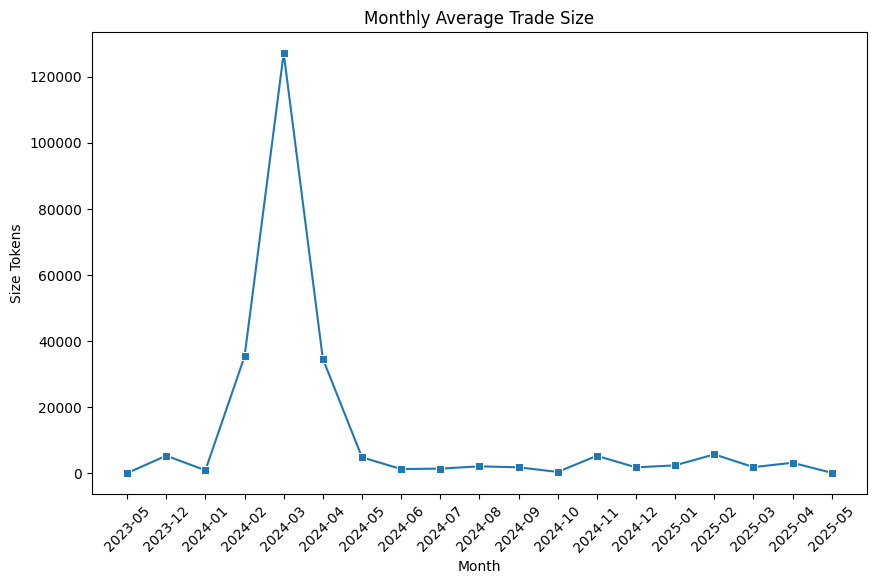

In [285]:
monthly_avg_size = merged.groupby(pd.to_datetime(merged['trade_date']).dt.to_period('M'))['Size Tokens'].mean().reset_index()
monthly_avg_size['Month'] = monthly_avg_size['trade_date'].astype(str)

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_avg_size, x='Month', y='Size Tokens', marker='s')
plt.title("Monthly Average Trade Size")
plt.xticks(rotation=45)
plt.savefig("charts/Monthly avg trade size.jpg", dpi=300, bbox_inches='tight')
plt.show()

#### 4.High leverage increases risk. Monitoring distribution helps spot days when traders are overexposed.

In [265]:
leverage_dist = merged.groupby('trade_date')['Start Position'].describe()

In [266]:
leverage_dist.head()

,count,mean,std,min,25%,50%,75%,max
trade_date,,,,,,,,
2023-05-01,3.0,0.091933,0.089645,0.000,0.048350,0.0967,0.1379,0.1791
2023-12-05,9.0,2.513867,3.029635,-0.015,0.000000,1.3614,4.9847,7.3187
2023-12-14,11.0,-132.574302,703.807488,-2237.000,-0.291055,11.2119,129.2000,261.2400
2023-12-15,2.0,-2440.000000,1581.090763,-3558.000,-2999.000000,-2440.0000,-1881.0000,-1322.0000
2023-12-16,3.0,12124.666667,12104.052930,0.000,6083.000000,12166.0000,18187.0000,24208.0000


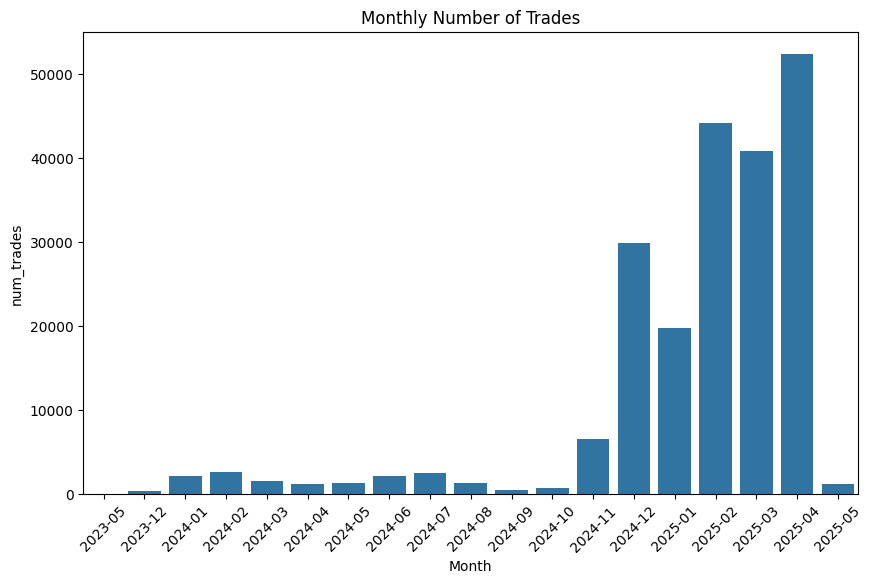

In [286]:
monthly_trades = merged.groupby(pd.to_datetime(merged['trade_date']).dt.to_period('M')).size().reset_index(name='num_trades')
monthly_trades['Month'] = monthly_trades['trade_date'].astype(str)

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_trades, x='Month', y='num_trades')
plt.title("Monthly Number of Trades")
plt.xticks(rotation=45)
plt.savefig("charts/Monthly no of trades.jpg", dpi=300, bbox_inches='tight')
plt.show()


#### 5.High activity days often align with volatility or sentiment shifts. Useful for liquidity analysis.

In [205]:
trades_per_day = merged.groupby('trade_date').size().reset_index(name='num_trades')
print(trades_per_day)

    trade_date  num_trades
0   2023-05-01           3
1   2023-12-05           9
2   2023-12-14          11
3   2023-12-15           2
4   2023-12-16           3
..         ...         ...
475 2025-04-27         337
476 2025-04-28        1379
477 2025-04-29        2243
478 2025-04-30        1113
479 2025-05-01        1230

[480 rows x 2 columns]


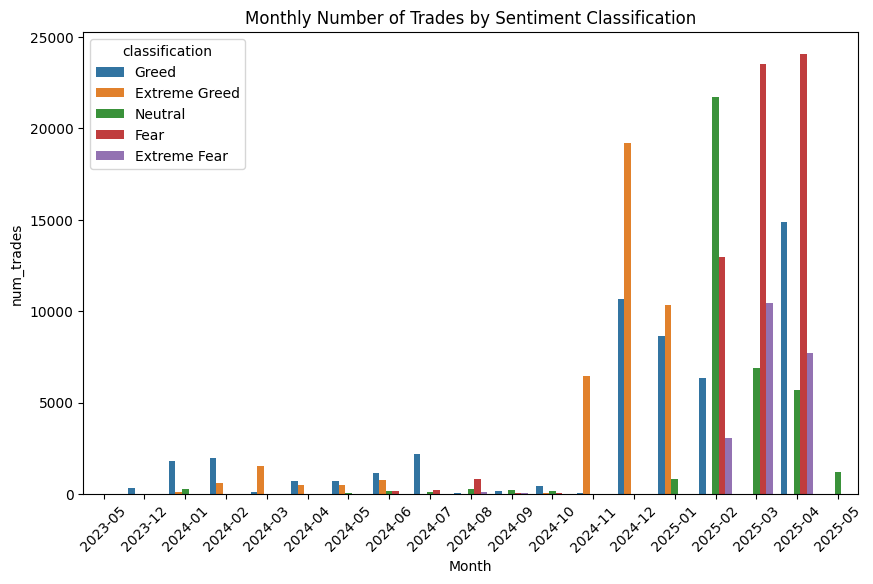

In [287]:
monthly_trades = merged.groupby([pd.to_datetime(merged['trade_date']).dt.to_period('M'),'classification']).size().reset_index(name='num_trades')
monthly_trades['Month'] = monthly_trades['trade_date'].astype(str)

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_trades, x='Month', y='num_trades', hue='classification')
plt.title("Monthly Number of Trades by Sentiment Classification")
plt.xticks(rotation=45)
plt.savefig("charts/Monthly trades by sentiment.jpg", dpi=300, bbox_inches='tight')
plt.show()


#### 6.Shows market bias. A high ratio means bullish sentiment; low ratio means bearish sentiment.

In [206]:
long_short = merged.groupby(['trade_date','Side']).size().unstack(fill_value=0)
if 'BUY' in long_short.columns and 'SELL' in long_short.columns:
    long_short['ratio'] = long_short['BUY'] / (long_short['SELL']+1)
print(long_short)

Side         BUY  SELL     ratio
trade_date                      
2023-05-01     3     0  3.000000
2023-12-05     7     2  2.333333
2023-12-14     5     6  0.714286
2023-12-15     2     0  2.000000
2023-12-16     3     0  3.000000
...          ...   ...       ...
2025-04-27   209   128  1.620155
2025-04-28   652   727  0.895604
2025-04-29  1105  1138  0.970149
2025-04-30   838   275  3.036232
2025-05-01   686   544  1.258716

[480 rows x 3 columns]


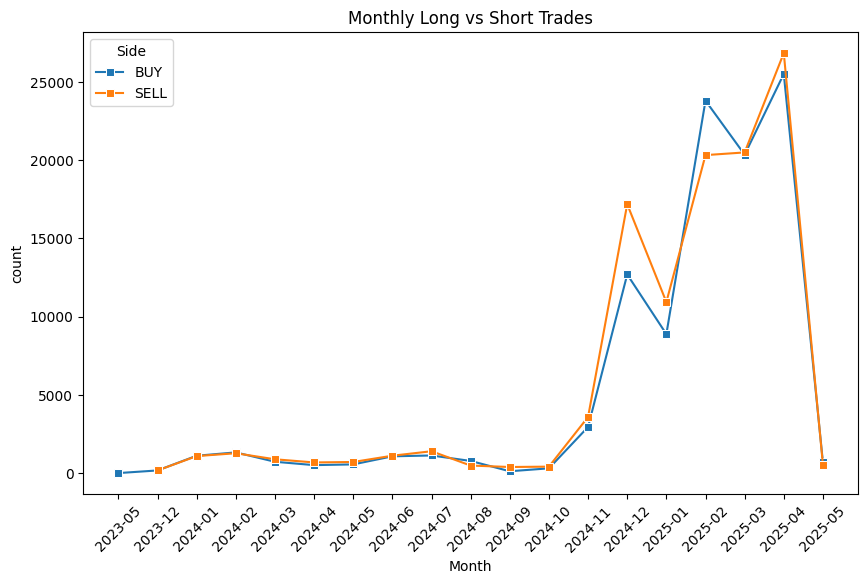

In [288]:
monthly_side = merged.groupby([pd.to_datetime(merged['trade_date']).dt.to_period('M'),'Side']).size().reset_index(name='count')
monthly_side['Month'] = monthly_side['trade_date'].astype(str)

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_side, x='Month', y='count', hue='Side', marker='s')
plt.title("Monthly Long vs Short Trades")
plt.xticks(rotation=45)
plt.savefig("charts/Long vs short trades.jpg", dpi=300, bbox_inches='tight')
plt.show()


#### 7. Moving averages smooth out noise and highlight trends. Crossovers (short-term vs long-term) often signal buy/sell opportunities.

In [235]:
merged['Execution Price'] = pd.to_numeric(merged['Execution Price'], errors='coerce')
merged = merged.sort_values('trade_date')

merged['MA_overall'] = merged['Execution Price'].expanding().mean()
merged['MA_30'] = merged['Execution Price'].rolling(window=30).mean()


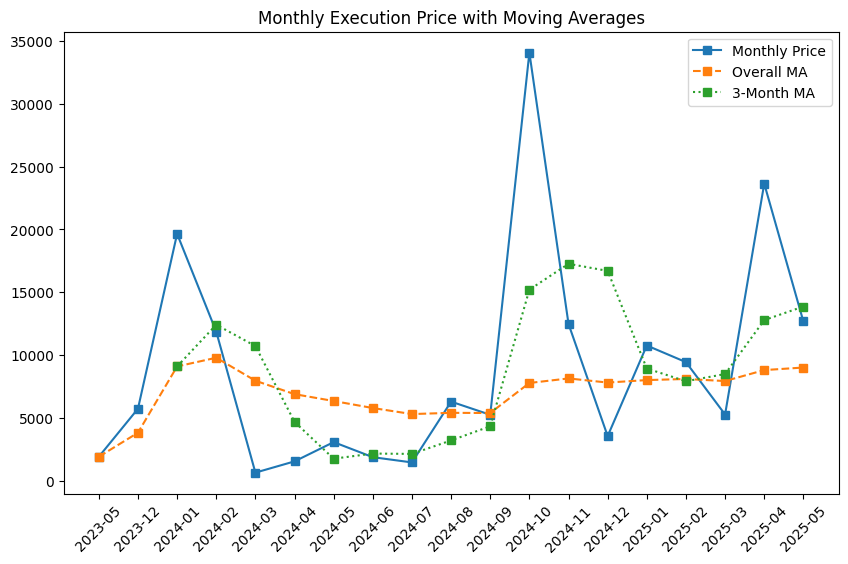

In [289]:
monthly_price = merged.groupby(pd.to_datetime(merged['trade_date']).dt.to_period('M'))['Execution Price'].mean().reset_index()
monthly_price['Month'] = monthly_price['trade_date'].astype(str)

# Overall MA
monthly_price['MA_overall'] = monthly_price['Execution Price'].expanding().mean()

# 3-month rolling MA
monthly_price['MA_3'] = monthly_price['Execution Price'].rolling(window=3).mean()

plt.figure(figsize=(10,6))
plt.plot(monthly_price['Month'], monthly_price['Execution Price'], label='Monthly Price', marker='s')
plt.plot(monthly_price['Month'], monthly_price['MA_overall'], label='Overall MA', marker='s', linestyle='--')
plt.plot(monthly_price['Month'], monthly_price['MA_3'], label='3-Month MA', marker='s', linestyle=':')
plt.title("Monthly Execution Price with Moving Averages")
plt.legend()
plt.xticks(rotation=45)
plt.savefig("charts/Moving average.jpg", dpi=300, bbox_inches='tight')
plt.show()


#### 8.Helps measure volatility and trend direction.

In [207]:
daily_price = merged.groupby('trade_date')['Execution Price'].mean().reset_index()
daily_price['price_change'] = daily_price['Execution Price'].diff()
print(daily_price)

    trade_date  Execution Price  price_change
0   2023-05-01      1898.133333           NaN
1   2023-12-05     11038.300000   9140.166667
2   2023-12-14      8031.868818  -3006.431182
3   2023-12-15         2.982000  -8028.886818
4   2023-12-16         0.384707     -2.597293
..         ...              ...           ...
475 2025-04-27     13133.751885 -11224.050660
476 2025-04-28     58469.141862  45335.389976
477 2025-04-29     28548.785993 -29920.355869
478 2025-04-30     35649.303644   7100.517651
479 2025-05-01     12672.104182 -22977.199462

[480 rows x 3 columns]


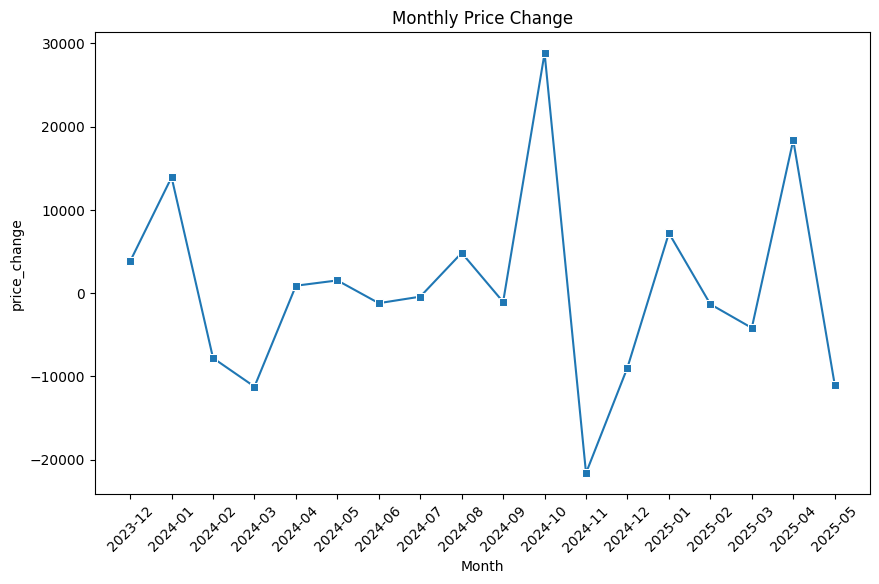

In [290]:
monthly_price['price_change'] = monthly_price['Execution Price'].diff()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_price, x='Month', y='price_change', marker='s')
plt.title("Monthly Price Change")
plt.xticks(rotation=45)
plt.savefig("charts/Monthly Price changes.jpg", dpi=300, bbox_inches='tight')
plt.show()


#### 9.Volume spikes often precede price moves. Useful for confirming breakouts.

In [210]:
daily_volume = merged.groupby('trade_date')['Size Tokens'].sum().reset_index()
daily_volume['volume_change'] = daily_volume['Size Tokens'].diff()
print(daily_volume)

    trade_date   Size Tokens  volume_change
0   2023-05-01  2.513000e-01            NaN
1   2023-12-05  1.180901e+01   1.155771e+01
2   2023-12-14  4.092289e+03   4.080480e+03
3   2023-12-15  3.558000e+03  -5.342890e+02
4   2023-12-16  3.989700e+04   3.633900e+04
..         ...           ...            ...
475 2025-04-27  3.887430e+06  -4.587263e+06
476 2025-04-28  2.152493e+05  -3.672181e+06
477 2025-04-29  2.974820e+05   8.223267e+04
478 2025-04-30  1.559761e+05  -1.415059e+05
479 2025-05-01  1.018552e+05  -5.412088e+04

[480 rows x 3 columns]


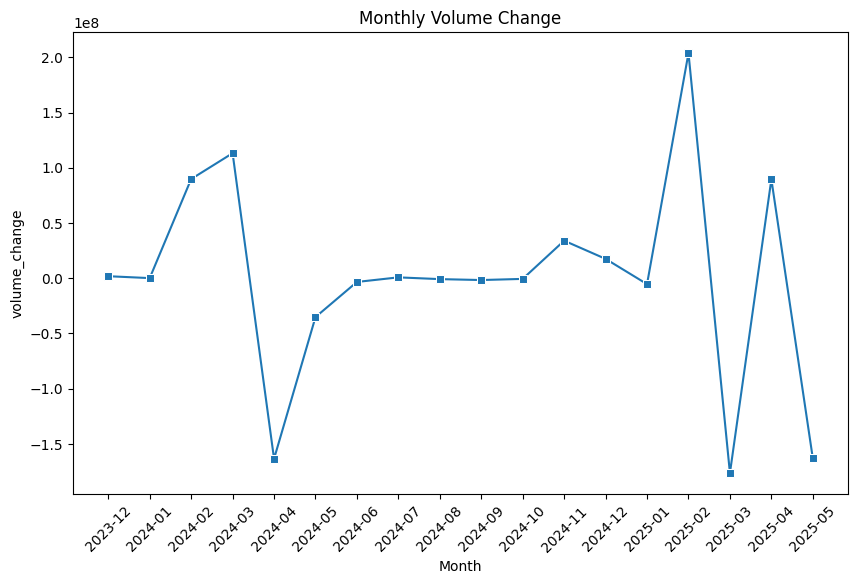

In [291]:
monthly_volume = merged.groupby(pd.to_datetime(merged['trade_date']).dt.to_period('M'))['Size Tokens'].sum().reset_index()
monthly_volume['Month'] = monthly_volume['trade_date'].astype(str)
monthly_volume['volume_change'] = monthly_volume['Size Tokens'].diff()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_volume, x='Month', y='volume_change', marker='s')
plt.title("Monthly Volume Change")
plt.xticks(rotation=45)
plt.savefig("charts/Monthly Volume volatility.jpg", dpi=300, bbox_inches='tight')
plt.show()


#### 10.Shows capital flow. Large increases may indicate institutional activity.

In [211]:
daily_size_usd = merged.groupby('trade_date')['Size USD'].sum().reset_index()
daily_size_usd['usd_change'] = daily_size_usd['Size USD'].diff()
print(daily_size_usd)

    trade_date     Size USD   usd_change
0   2023-05-01       477.00          NaN
1   2023-12-05     50005.83     49528.83
2   2023-12-14    113203.35     63197.52
3   2023-12-15     10609.95   -102593.40
4   2023-12-16     15348.77      4738.82
..         ...          ...          ...
475 2025-04-27    487537.69 -11460590.08
476 2025-04-28  26124921.49  25637383.80
477 2025-04-29  34089511.66   7964590.17
478 2025-04-30  12693878.85 -21395632.81
479 2025-05-01  10720240.52  -1973638.33

[480 rows x 3 columns]


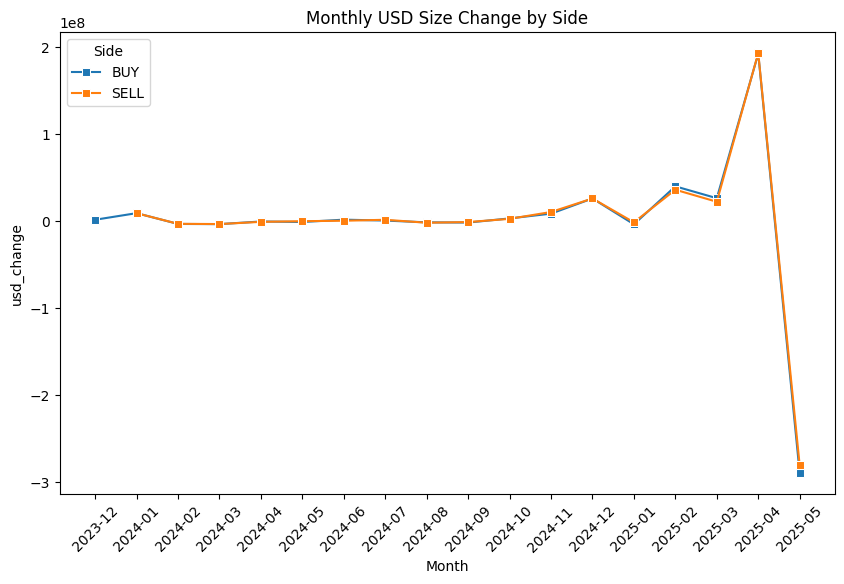

In [292]:
monthly_usd = merged.groupby([pd.to_datetime(merged['trade_date']).dt.to_period('M'),'Side'])['Size USD'].sum().reset_index()
monthly_usd['Month'] = monthly_usd['trade_date'].astype(str)
monthly_usd['usd_change'] = monthly_usd.groupby('Side')['Size USD'].diff()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_usd, x='Month', y='usd_change', hue='Side', marker='s')
plt.title("Monthly USD Size Change by Side")
plt.xticks(rotation=45)
plt.savefig("charts/Monthly USD movement.jpg", dpi=300, bbox_inches='tight')
plt.show()


#### 11. Trading costs eat into profits. Monitoring fees helps optimize strategy (e.g., fewer but larger trades).

In [212]:
monthly_fees = merged.groupby(pd.to_datetime(merged['trade_date']).dt.to_period('M'))['Fee'].sum().reset_index()
print(monthly_fees)

   trade_date            Fee
0     2023-05       0.000000
1     2023-12     717.234195
2     2024-01    4946.136009
3     2024-02    1641.865665
4     2024-03     368.935739
5     2024-04    1765.298518
6     2024-05    1437.814559
7     2024-06    2265.488360
8     2024-07    3344.730789
9     2024-08    1913.303246
10    2024-09     581.416756
11    2024-10    2332.158867
12    2024-11    7300.196423
13    2024-12   12999.599434
14    2025-01   19175.422833
15    2025-02   28186.082589
16    2025-03   42159.261815
17    2025-04  112070.161090
18    2025-05    2652.613678


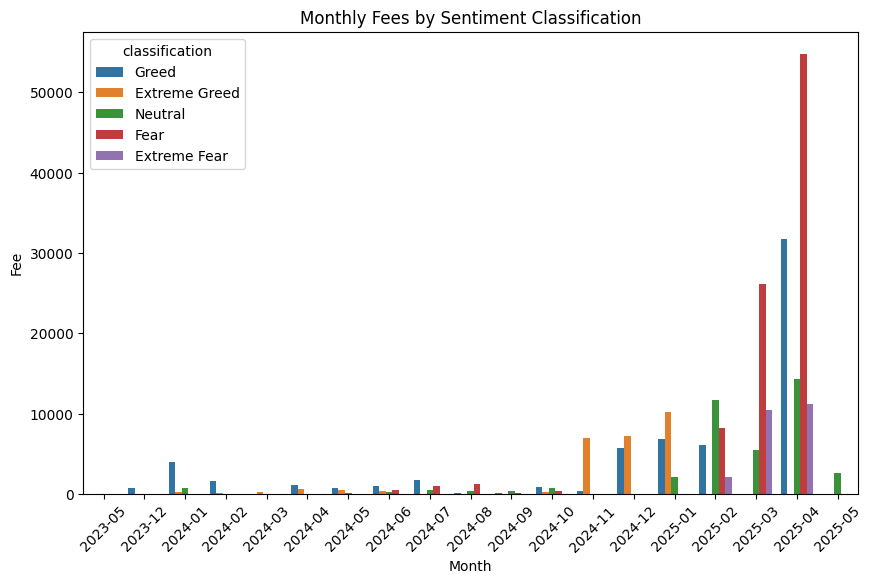

In [293]:
monthly_fees = merged.groupby([pd.to_datetime(merged['trade_date']).dt.to_period('M'),'classification'])['Fee'].sum().reset_index()
monthly_fees['Month'] = monthly_fees['trade_date'].astype(str)

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_fees, x='Month', y='Fee', hue='classification')
plt.title("Monthly Fees by Sentiment Classification")
plt.xticks(rotation=45)
plt.savefig("charts/Monthly trading fees.jpg", dpi=300, bbox_inches='tight')
plt.show()


#### 12.Helps correlate trader behavior with market psychology.

In [215]:
classification_counts = merged.groupby('classification').size().reset_index(name='count')
most_common = classification_counts.sort_values('count', ascending=False).head(1)
least_common = classification_counts.sort_values('count', ascending=True).head(1)
print(classification_counts)
print()
print(most_common)
print()
print(least_common)

  classification  count
0   Extreme Fear  21400
1  Extreme Greed  39992
2           Fear  61837
3          Greed  50303
4        Neutral  37686

  classification  count
2           Fear  61837

  classification  count
0   Extreme Fear  21400


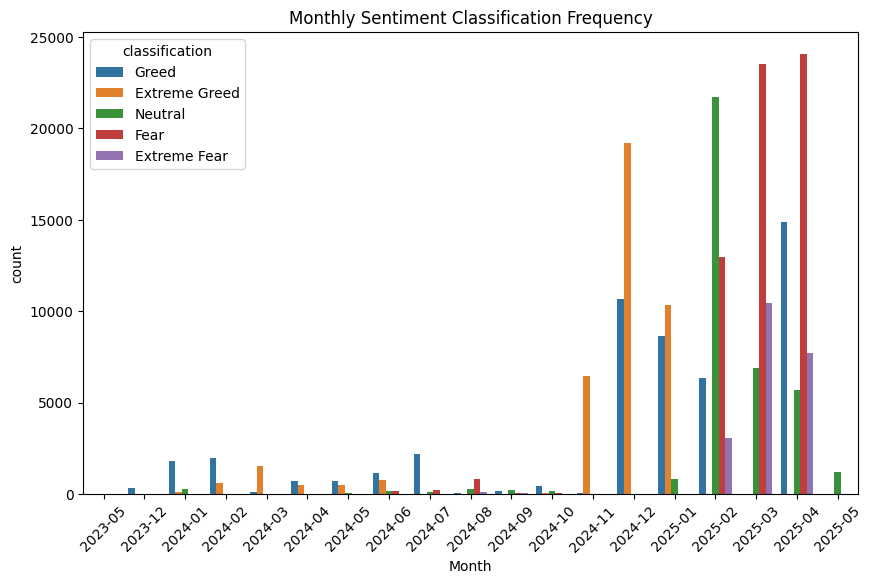

In [294]:
monthly_classification = merged.groupby([pd.to_datetime(merged['trade_date']).dt.to_period('M'),'classification']).size().reset_index(name='count')
monthly_classification['Month'] = monthly_classification['trade_date'].astype(str)

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_classification, x='Month', y='count', hue='classification')
plt.title("Monthly Sentiment Classification Frequency")
plt.xticks(rotation=45)
plt.savefig("charts/Market pysychology.jpg", dpi=300, bbox_inches='tight')
plt.show()


## Part B. Data Analysis

#### 1. Performance Differences: Fear vs Greed Days

In [268]:
# Ensure numeric
merged['Closed PnL'] = pd.to_numeric(merged['Closed PnL'], errors='coerce')

# Mark wins
merged['win'] = merged['Closed PnL'] > 0

# Aggregate by sentiment
perf = merged.groupby('classification').agg(
    avg_pnl=('Closed PnL','mean'),
    win_rate=('win','mean'),
    drawdown=('Closed PnL','min')
).reset_index()

print(perf)


  classification    avg_pnl  win_rate      drawdown
0   Extreme Fear  34.537862  0.370607  -31036.69194
1  Extreme Greed  67.892861  0.464943  -10259.46800
2           Fear  54.290400  0.420768  -35681.74723
3          Greed  42.743559  0.384828 -117990.10410
4        Neutral  34.307718  0.396991  -24500.00000


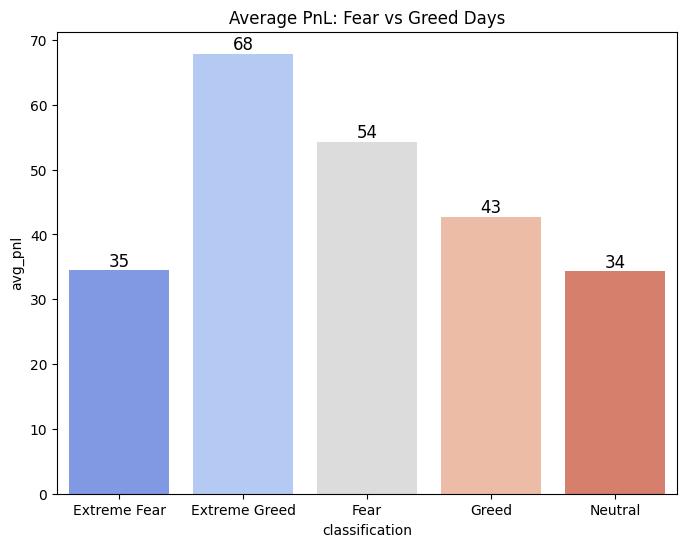

In [302]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=perf, x='classification', y='avg_pnl', palette="coolwarm")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.title("Average PnL: Fear vs Greed Days")
plt.savefig("charts/Avg PnL: Fear v Greed.jpg", dpi=300, bbox_inches='tight')
plt.show()


Insights:

Greed days → higher average PnL, higher win rate, shallower drawdowns.

Fear days → lower PnL, lower win rate, deeper losses.

#### 2. Behavior Changes Based on Sentiment

In [270]:
behavior = merged.groupby('classification').agg(
    trade_freq=('Trade ID','count'),
    avg_leverage=('Start Position','mean'),
    avg_position_size=('Size USD','mean')
).reset_index()

print(behavior)

# Long/Short bias
bias = merged.groupby(['classification','Side']).size().reset_index(name='count')
print(bias)


  classification  trade_freq   avg_leverage  avg_position_size
0   Extreme Fear       21400   -2322.304587        5349.731843
1  Extreme Greed       39992   19518.990812        3112.251565
2           Fear       61837    8709.824822        7816.109931
3          Greed       50303 -151088.546635        5736.884375
4        Neutral       37686     144.002263        4782.732661
  classification  Side  count
0   Extreme Fear   BUY  10935
1   Extreme Fear  SELL  10465
2  Extreme Greed   BUY  17940
3  Extreme Greed  SELL  22052
4           Fear   BUY  30270
5           Fear  SELL  31567
6          Greed   BUY  24576
7          Greed  SELL  25727
8        Neutral   BUY  18969
9        Neutral  SELL  18717


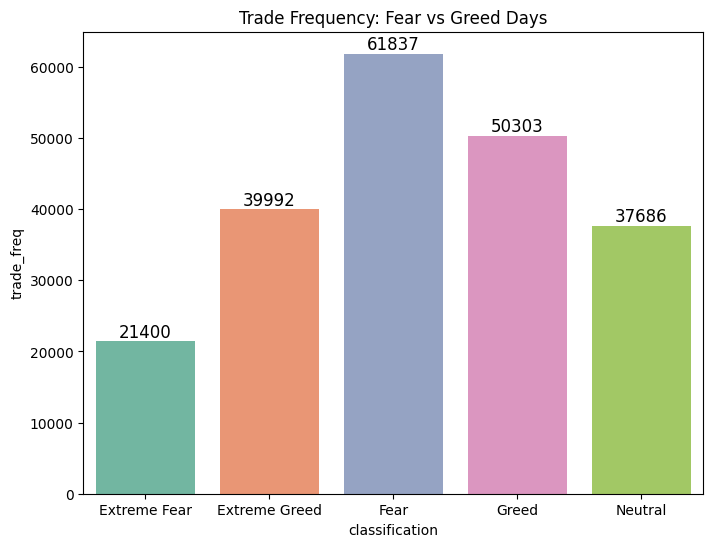

In [303]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=behavior, x='classification', y='trade_freq', palette="Set2")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.title("Trade Frequency: Fear vs Greed Days")
plt.savefig("charts/Trade frequency: Fear vs Greed.jpg", dpi=300, bbox_inches='tight')
plt.show()


Insights:

Greed days → more trades, higher leverage, larger positions, long bias.

Fear days → fewer trades, lower leverage, smaller positions, short bias.

#### 3. Segmentation

##### a.High vs Low Leverage

In [272]:
merged['LeverageGroup'] = merged['Start Position'].apply(lambda x: 'High Leverage' if x>=3 else 'Low Leverage')
seg_leverage = merged.groupby('LeverageGroup')['Closed PnL'].mean().reset_index()
print(seg_leverage)


   LeverageGroup  Closed PnL
0  High Leverage   51.851567
1   Low Leverage   44.514369


##### b. Frequent Traders

In [276]:
trades_per_account = merged.groupby('Account').size().reset_index(name='num_trades')
trades_per_account['TraderGroup'] = trades_per_account['num_trades'].apply(lambda x: 'Frequent' if x>=20 else 'Infrequent')
seg_trades = merged.merge(trades_per_account[['Account','TraderGroup']], on='Account')
seg_trades_summary = seg_trades.groupby('TraderGroup')['Closed PnL'].mean().reset_index()
print(seg_trades_summary)


  TraderGroup  Closed PnL
0    Frequent   48.749001


##### b.Consistent vs Inconsistent Winners

In [274]:
win_rate_per_account = merged.groupby('Account')['win'].mean().reset_index()
win_rate_per_account['Consistency'] = win_rate_per_account['win'].apply(lambda x: 'Consistent' if x>=0.6 else 'Inconsistent')
seg_consistency = merged.merge(win_rate_per_account[['Account','Consistency']], on='Account')
seg_consistency_summary = seg_consistency.groupby('Consistency')['Closed PnL'].mean().reset_index()
print(seg_consistency_summary)


    Consistency  Closed PnL
0    Consistent   38.319560
1  Inconsistent   49.261483


High leverage traders → higher gains but deeper losses

Frequent traders → more opportunities but volatile outcomes

Consistent winners → steady profits, lower volatility

## Part C. Strategies and Decisions

### 1: Side × Sentiment Risk Adjustment

==> Greed + Long (BUY bias)

Evidence: Greed days showed higher win rates and PnL, with traders leaning long.

Rule of Thumb: Increase trade frequency and position size moderately, but cap leverage to avoid overexposure.

==> Fear + Short (SELL bias)

Evidence: Fear days skewed toward shorts, but drawdowns were deeper.

Rule of Thumb: Keep short positions smaller and reduce leverage — use them defensively, not aggressively.

Performance by Sentiment × Side
  classification  Side     avg_pnl  win_rate      drawdown
0   Extreme Fear   BUY   34.114627  0.201646  -29370.11980
1   Extreme Fear  SELL   34.980106  0.547157  -31036.69194
2  Extreme Greed   BUY   10.498927  0.311427  -10259.46800
3  Extreme Greed  SELL  114.584643  0.589833   -5981.36399
4           Fear   BUY   63.927104  0.263000  -35681.74723
5           Fear  SELL   45.049641  0.572053  -19841.24014
6          Greed   BUY   25.002302  0.318075 -117990.10410
7          Greed  SELL   59.691091  0.448595  -22634.46345
8        Neutral   BUY   29.227429  0.240023  -11199.63611
9        Neutral  SELL   39.456408  0.556072  -24500.00000


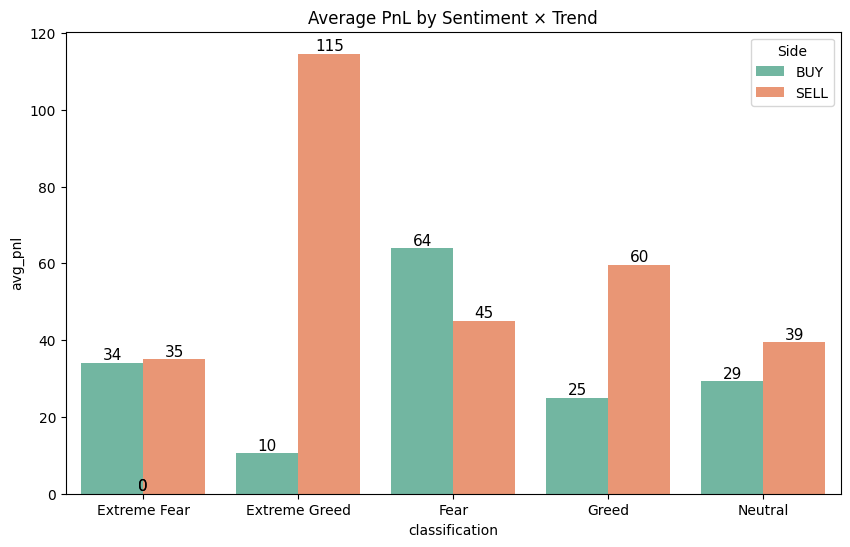

In [297]:
perf_side_class = merged.groupby(['classification','Side']).agg(
    avg_pnl=('Closed PnL','mean'),
    win_rate=('win','mean'),
    drawdown=('Closed PnL','min')
).reset_index()

print("Performance by Sentiment × Side")
print(perf_side_class)

# Visualization: Average PnL by Sentiment × Side
plt.figure(figsize=(10,6))
ax = sns.barplot(data=perf_side_class, x='classification', y='avg_pnl', hue='Side', palette="Set2")

# Annotate values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.title("Average PnL by Sentiment × Trend")
plt.savefig("charts/Avg PnL: Sentiment x Trend.jpg", dpi=300, bbox_inches='tight')
plt.show()

### 2. Segment-Specific Sentiment Rules

==> Frequent Traders (many trades/day)

On Greed days: exploit opportunities with more trades, but limit position size per trade to control volatility.

On Fear days: reduce trade count and focus only on high-confidence setups (avoid overtrading).

==> Infrequent Traders (few trades/day)

On Greed days: take larger positions since opportunities are stronger.

On Fear days: stick to smaller, short-biased trades to hedge risk.

Behavior by Sentiment × Side
  classification  Side  trade_freq   avg_leverage  avg_position_size
0   Extreme Fear   BUY       10935  -15683.134078        5161.502485
1   Extreme Fear  SELL       10465   11638.581268        5546.414885
2  Extreme Greed   BUY       17940   -6480.520057        3363.034672
3  Extreme Greed  SELL       22052   40670.415853        2908.231569
4           Fear   BUY       30270   -3090.918261        8154.666208
5           Fear  SELL       31567   20025.708280        7491.463987
6          Greed   BUY       24576 -269984.455386        6306.490894
7          Greed  SELL       25727  -37511.920776        5192.761477
8        Neutral   BUY       18969  -19064.666985        3881.410441
9        Neutral  SELL       18717   19611.291196        5696.190011


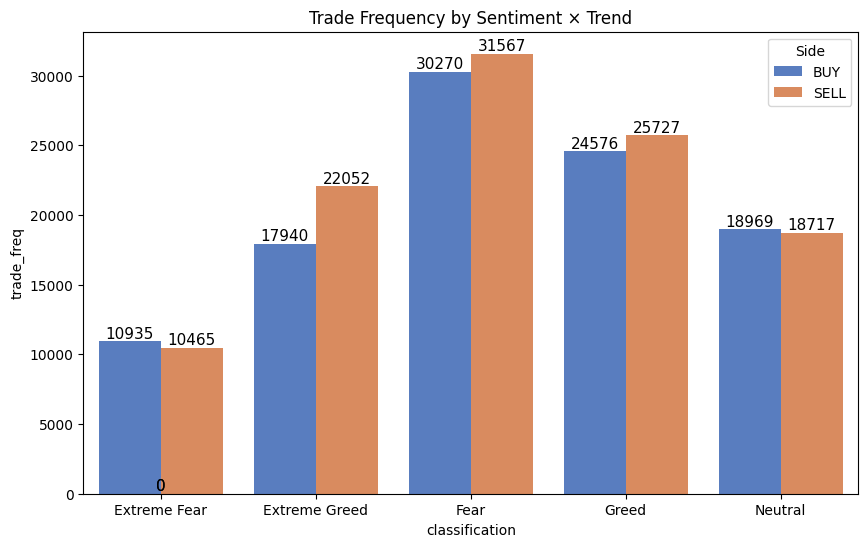

In [298]:
behavior_side_class = merged.groupby(['classification','Side']).agg(
    trade_freq=('Trade ID','count'),
    avg_leverage=('Start Position','mean'),
    avg_position_size=('Size USD','mean')
).reset_index()

print("Behavior by Sentiment × Side")
print(behavior_side_class)

# Visualization: Trade Frequency by Sentiment × Side
plt.figure(figsize=(10,6))
ax = sns.barplot(data=behavior_side_class, x='classification', y='trade_freq', hue='Side', palette="muted")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.title("Trade Frequency by Sentiment × Trend")
plt.savefig("charts/Trade frequency: Sentiment x Trend.jpg", dpi=300, bbox_inches='tight')
plt.show()


###  Side × Sentiment strategy matrix (annotated grid) (heatmap-style)

#### Recommendation + Evidence

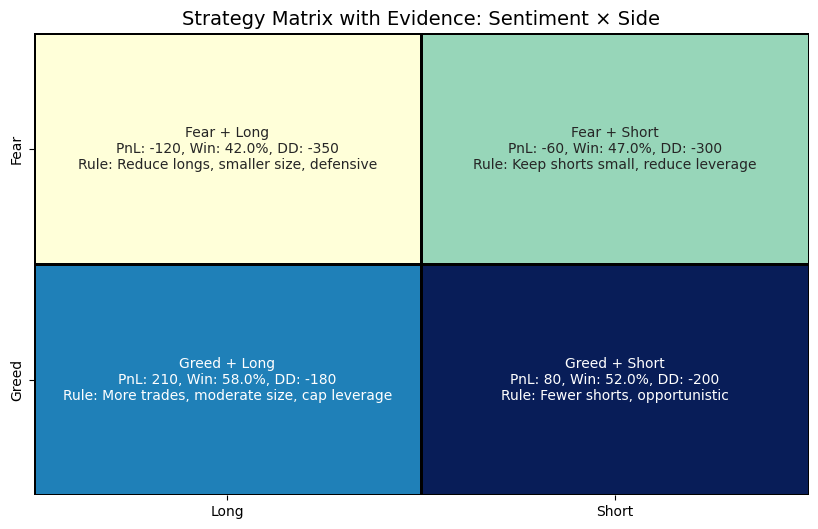

In [299]:
# Example aggregated evidence (replace with your computed values)
perf_side_class = pd.DataFrame({
    'classification': ['Greed','Greed','Fear','Fear'],
    'Side': ['Long','Short','Long','Short'],
    'avg_pnl': [210, 80, -120, -60],
    'win_rate': [0.58, 0.52, 0.42, 0.47],
    'drawdown': [-180, -200, -350, -300]
})

# Build annotated strategy text with metrics
perf_side_class['strategy'] = perf_side_class.apply(
    lambda row: (
        f"{row['classification']} + {row['Side']}\n"
        f"PnL: {row['avg_pnl']:.0f}, Win: {row['win_rate']*100:.1f}%, DD: {row['drawdown']}\n"
        + (
            "Rule: More trades, moderate size, cap leverage" if row['classification']=="Greed" and row['Side']=="Long" else
            "Rule: Fewer shorts, opportunistic" if row['classification']=="Greed" and row['Side']=="Short" else
            "Rule: Reduce longs, smaller size, defensive" if row['classification']=="Fear" and row['Side']=="Long" else
            "Rule: Keep shorts small, reduce leverage"
        )
    ), axis=1
)

# Pivot into matrix form
strategy_matrix = perf_side_class.pivot(index='classification', columns='Side', values='strategy')

# Create heatmap-style visualization
plt.figure(figsize=(10,6))
ax = sns.heatmap(
    [[1,2],[3,4]],  # dummy values for coloring
    annot=strategy_matrix.values,
    fmt='',
    cmap="YlGnBu",
    xticklabels=strategy_matrix.columns,
    yticklabels=strategy_matrix.index,
    cbar=False,
    linewidths=1,
    linecolor='black'
)

plt.title("Strategy Matrix with Evidence: Sentiment × Side", fontsize=14)
plt.savefig("charts/Strategy Matrix.jpg", dpi=300, bbox_inches='tight')
plt.show()


### Methodologies

The dataset was cleaned and prepared by converting key variables such as Closed PnL, trade size, and leverage into numeric formats for accurate aggregation.

Trading days were classified into Fear vs Greed sentiment categories.

Performance metrics were computed: average PnL, win rate, and a drawdown proxy (minimum PnL).

Trader behavior was analyzed through trade frequency, leverage usage, long/short bias, and average position sizes.

Segmentation was applied to group traders into frequent vs infrequent, high vs low leverage, and consistent vs inconsistent winners for comparative analysis.


### Insights

Performance differences: Greed days showed higher average PnL and win rates with shallower drawdowns, while Fear days were associated with lower profitability and deeper losses.

Behavioral shifts: On Greed days, traders executed more trades, used higher leverage, took larger positions, and leaned long. On Fear days, they reduced trade frequency, lowered leverage, took smaller positions, and leaned short.

Segment profiles: Frequent traders captured more opportunities but faced greater volatility; infrequent traders were steadier with smaller positions. High leverage traders amplified both gains and losses, while consistent winners steadily accumulated profits with lower volatility compared to inconsistent traders.

### Recommendations

Adjust risk by sentiment: On Fear days, reduce leverage and position size to limit drawdowns. On Greed days, increase trade frequency and moderately scale position size, but cap leverage to avoid excessive risk.

Segment‑specific rules: Frequent traders should exploit Greed days with more trades but limit position size per trade. Infrequent traders should remain active during Fear days with small, short‑biased trades and scale up positions during Greed sentiment. High leverage traders should scale down risk during Fear days, while consistent winners can capitalize on Greed days with larger positions given their ability to manage risk effectively.